In [68]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
# from __future__ import unicode_literals
import numpy as np
from PIL import Image
import time
import argparse
import pyflow
import fnmatch
import os
import matplotlib.pyplot as plt
import cv2
import h5py
    
# Flow Options:
alpha = 0.012
ratio = 0.75
minWidth = 20
nOuterFPIterations = 7
nInnerFPIterations = 1
nSORIterations = 30
colType = 1  # 0 or default:RGB, 1:GRAY (but pass gray image with shape (h,w,1))
#---------------------------------------------------------------------------------------
path = '/usr/not-backed-up/1_DATABASE/UCSD_Anomaly_Dataset.tar/UCSD_Anomaly_Dataset.v1p2/'
data = 'UCSDped1/'
subset = 'Train/'
savePath = path + 'Flow_python_240x360' + subset
savePath_patch = path + 'Flow_python_flowPatch24'

if not os.path.exists(savePath):
    os.mkdir(savePath)
cur_fold = path + data + subset

for seq in range(34):
    id = 0
    print(seq)
    if seq < 9:                
        dirpath = (cur_fold + 'Train00%d' % (seq+1))
    else:
        dirpath = (cur_fold + 'Train0%d' % (seq+1))
    nfr = len(fnmatch.filter(os.listdir(dirpath), '*.tif'))
    flow_seq = np.zeros((240,360,2,199),dtype=np.float64)
    for fr in range(nfr-1):
        print(fr)
        if fr < 8:
            first = '00%d' % (fr+1)
            second = '00%d' % (fr+2)
        elif fr == 8:
            first = '00%d' % (fr+1)
            second = '0%d' % (fr+2)            
        elif fr < 98:
            first = '0%d' % (fr+1)
            second = '0%d' % (fr+2)                        
        elif fr == 98:
            first = '0%d' % (fr+1)
            second = '%d' % (fr+2)            
        else:
            first = '%d' % (fr+1)
            second = '%d' % (fr+2)     
        im1 = Image.open(dirpath + '/' + first + '.tif')
        im1 = np.array(im1.resize((360,240),Image.BILINEAR))#size [width,height]            
        im1 = np.reshape(im1,[240,360,1])
        
#         im1 = np.concatenate((im1[..., None],im1[..., None],im1[..., None]),axis=2)
        im2 = Image.open(dirpath + '/' + second + '.tif')
        im2 = np.array(im2.resize((360,240),Image.BILINEAR))       
        im2 = np.reshape(im2,[240,360,1])
#         im2 = np.concatenate((im2[..., None],im2[..., None],im2[..., None]),axis=2)        
        im1 = im1.astype(float) / 255.
        im2 = im2.astype(float) / 255.
        
        
        # s = time.time()
        u, v, im2W = pyflow.coarse2fine_flow(
            im1, im2, alpha, ratio, minWidth, nOuterFPIterations, nInnerFPIterations,
            nSORIterations, colType)
        s = im1.shape
        flow = np.zeros((s[0],s[1],2))
        flow[:,:,0] = u
        flow[:,:,1] = v        
        flow_seq[:,:,:,fr] = flow        
        print(flow_seq.shape)    
    filename = ("train_flow_%d.h5" % (seq+1))         
#         print(path_s)
    h5f = h5py.File(savePath + filename, 'w')
    h5f.create_dataset('flow_seq', data=flow_seq)


0
0
(240, 360, 2, 199)
1
(240, 360, 2, 199)
2
(240, 360, 2, 199)
3
(240, 360, 2, 199)
4
(240, 360, 2, 199)
5
(240, 360, 2, 199)
6
(240, 360, 2, 199)
7
(240, 360, 2, 199)
8
(240, 360, 2, 199)
9
(240, 360, 2, 199)
10
(240, 360, 2, 199)
11
(240, 360, 2, 199)
12
(240, 360, 2, 199)
13
(240, 360, 2, 199)
14
(240, 360, 2, 199)
15
(240, 360, 2, 199)
16
(240, 360, 2, 199)
17
(240, 360, 2, 199)
18
(240, 360, 2, 199)
19
(240, 360, 2, 199)
20
(240, 360, 2, 199)
21
(240, 360, 2, 199)
22
(240, 360, 2, 199)
23
(240, 360, 2, 199)
24
(240, 360, 2, 199)
25
(240, 360, 2, 199)
26
(240, 360, 2, 199)
27
(240, 360, 2, 199)
28
(240, 360, 2, 199)
29
(240, 360, 2, 199)
30
(240, 360, 2, 199)
31
(240, 360, 2, 199)
32
(240, 360, 2, 199)
33
(240, 360, 2, 199)
34
(240, 360, 2, 199)
35
(240, 360, 2, 199)
36
(240, 360, 2, 199)
37
(240, 360, 2, 199)
38
(240, 360, 2, 199)
39
(240, 360, 2, 199)
40
(240, 360, 2, 199)
41
(240, 360, 2, 199)
42
(240, 360, 2, 199)
43
(240, 360, 2, 199)
44
(240, 360, 2, 199)
45
(240, 360, 2, 1

(240, 360, 2, 199)
168
(240, 360, 2, 199)
169
(240, 360, 2, 199)
170
(240, 360, 2, 199)
171
(240, 360, 2, 199)
172
(240, 360, 2, 199)
173
(240, 360, 2, 199)
174
(240, 360, 2, 199)
175
(240, 360, 2, 199)
176
(240, 360, 2, 199)
177
(240, 360, 2, 199)
178
(240, 360, 2, 199)
179
(240, 360, 2, 199)
180
(240, 360, 2, 199)
181
(240, 360, 2, 199)
182
(240, 360, 2, 199)
183
(240, 360, 2, 199)
184
(240, 360, 2, 199)
185
(240, 360, 2, 199)
186
(240, 360, 2, 199)
187
(240, 360, 2, 199)
188
(240, 360, 2, 199)
189
(240, 360, 2, 199)
190
(240, 360, 2, 199)
191
(240, 360, 2, 199)
192
(240, 360, 2, 199)
193
(240, 360, 2, 199)
194
(240, 360, 2, 199)
195
(240, 360, 2, 199)
196
(240, 360, 2, 199)
197
(240, 360, 2, 199)
198
(240, 360, 2, 199)
2
0
(240, 360, 2, 199)
1
(240, 360, 2, 199)
2
(240, 360, 2, 199)
3
(240, 360, 2, 199)
4
(240, 360, 2, 199)
5
(240, 360, 2, 199)
6
(240, 360, 2, 199)
7
(240, 360, 2, 199)
8
(240, 360, 2, 199)
9
(240, 360, 2, 199)
10
(240, 360, 2, 199)
11
(240, 360, 2, 199)
12
(240, 360

(240, 360, 2, 199)
136
(240, 360, 2, 199)
137
(240, 360, 2, 199)
138
(240, 360, 2, 199)
139
(240, 360, 2, 199)
140
(240, 360, 2, 199)
141
(240, 360, 2, 199)
142
(240, 360, 2, 199)
143
(240, 360, 2, 199)
144
(240, 360, 2, 199)
145
(240, 360, 2, 199)
146
(240, 360, 2, 199)
147
(240, 360, 2, 199)
148
(240, 360, 2, 199)
149
(240, 360, 2, 199)
150
(240, 360, 2, 199)
151
(240, 360, 2, 199)
152
(240, 360, 2, 199)
153
(240, 360, 2, 199)
154
(240, 360, 2, 199)
155
(240, 360, 2, 199)
156
(240, 360, 2, 199)
157
(240, 360, 2, 199)
158
(240, 360, 2, 199)
159
(240, 360, 2, 199)
160
(240, 360, 2, 199)
161
(240, 360, 2, 199)
162
(240, 360, 2, 199)
163
(240, 360, 2, 199)
164
(240, 360, 2, 199)
165
(240, 360, 2, 199)
166
(240, 360, 2, 199)
167
(240, 360, 2, 199)
168
(240, 360, 2, 199)
169
(240, 360, 2, 199)
170
(240, 360, 2, 199)
171
(240, 360, 2, 199)
172
(240, 360, 2, 199)
173
(240, 360, 2, 199)
174
(240, 360, 2, 199)
175
(240, 360, 2, 199)
176
(240, 360, 2, 199)
177
(240, 360, 2, 199)
178
(240, 360, 

(240, 360, 2, 199)
104
(240, 360, 2, 199)
105
(240, 360, 2, 199)
106
(240, 360, 2, 199)
107
(240, 360, 2, 199)
108
(240, 360, 2, 199)
109
(240, 360, 2, 199)
110
(240, 360, 2, 199)
111
(240, 360, 2, 199)
112
(240, 360, 2, 199)
113
(240, 360, 2, 199)
114
(240, 360, 2, 199)
115
(240, 360, 2, 199)
116
(240, 360, 2, 199)
117
(240, 360, 2, 199)
118
(240, 360, 2, 199)
119
(240, 360, 2, 199)
120
(240, 360, 2, 199)
121
(240, 360, 2, 199)
122
(240, 360, 2, 199)
123
(240, 360, 2, 199)
124
(240, 360, 2, 199)
125
(240, 360, 2, 199)
126
(240, 360, 2, 199)
127
(240, 360, 2, 199)
128
(240, 360, 2, 199)
129
(240, 360, 2, 199)
130
(240, 360, 2, 199)
131
(240, 360, 2, 199)
132
(240, 360, 2, 199)
133
(240, 360, 2, 199)
134
(240, 360, 2, 199)
135
(240, 360, 2, 199)
136
(240, 360, 2, 199)
137
(240, 360, 2, 199)
138
(240, 360, 2, 199)
139
(240, 360, 2, 199)
140
(240, 360, 2, 199)
141
(240, 360, 2, 199)
142
(240, 360, 2, 199)
143
(240, 360, 2, 199)
144
(240, 360, 2, 199)
145
(240, 360, 2, 199)
146
(240, 360, 

(240, 360, 2, 199)
71
(240, 360, 2, 199)
72
(240, 360, 2, 199)
73
(240, 360, 2, 199)
74
(240, 360, 2, 199)
75
(240, 360, 2, 199)
76
(240, 360, 2, 199)
77
(240, 360, 2, 199)
78
(240, 360, 2, 199)
79
(240, 360, 2, 199)
80
(240, 360, 2, 199)
81
(240, 360, 2, 199)
82
(240, 360, 2, 199)
83
(240, 360, 2, 199)
84
(240, 360, 2, 199)
85
(240, 360, 2, 199)
86
(240, 360, 2, 199)
87
(240, 360, 2, 199)
88
(240, 360, 2, 199)
89
(240, 360, 2, 199)
90
(240, 360, 2, 199)
91
(240, 360, 2, 199)
92
(240, 360, 2, 199)
93
(240, 360, 2, 199)
94
(240, 360, 2, 199)
95
(240, 360, 2, 199)
96
(240, 360, 2, 199)
97
(240, 360, 2, 199)
98
(240, 360, 2, 199)
99
(240, 360, 2, 199)
100
(240, 360, 2, 199)
101
(240, 360, 2, 199)
102
(240, 360, 2, 199)
103
(240, 360, 2, 199)
104
(240, 360, 2, 199)
105
(240, 360, 2, 199)
106
(240, 360, 2, 199)
107
(240, 360, 2, 199)
108
(240, 360, 2, 199)
109
(240, 360, 2, 199)
110
(240, 360, 2, 199)
111
(240, 360, 2, 199)
112
(240, 360, 2, 199)
113
(240, 360, 2, 199)
114
(240, 360, 2, 199

(240, 360, 2, 199)
38
(240, 360, 2, 199)
39
(240, 360, 2, 199)
40
(240, 360, 2, 199)
41
(240, 360, 2, 199)
42
(240, 360, 2, 199)
43
(240, 360, 2, 199)
44
(240, 360, 2, 199)
45
(240, 360, 2, 199)
46
(240, 360, 2, 199)
47
(240, 360, 2, 199)
48
(240, 360, 2, 199)
49
(240, 360, 2, 199)
50
(240, 360, 2, 199)
51
(240, 360, 2, 199)
52
(240, 360, 2, 199)
53
(240, 360, 2, 199)
54
(240, 360, 2, 199)
55
(240, 360, 2, 199)
56
(240, 360, 2, 199)
57
(240, 360, 2, 199)
58
(240, 360, 2, 199)
59
(240, 360, 2, 199)
60
(240, 360, 2, 199)
61
(240, 360, 2, 199)
62
(240, 360, 2, 199)
63
(240, 360, 2, 199)
64
(240, 360, 2, 199)
65
(240, 360, 2, 199)
66
(240, 360, 2, 199)
67
(240, 360, 2, 199)
68
(240, 360, 2, 199)
69
(240, 360, 2, 199)
70
(240, 360, 2, 199)
71
(240, 360, 2, 199)
72
(240, 360, 2, 199)
73
(240, 360, 2, 199)
74
(240, 360, 2, 199)
75
(240, 360, 2, 199)
76
(240, 360, 2, 199)
77
(240, 360, 2, 199)
78
(240, 360, 2, 199)
79
(240, 360, 2, 199)
80
(240, 360, 2, 199)
81
(240, 360, 2, 199)
82
(240, 360,

(240, 360, 2, 199)
4
(240, 360, 2, 199)
5
(240, 360, 2, 199)
6
(240, 360, 2, 199)
7
(240, 360, 2, 199)
8
(240, 360, 2, 199)
9
(240, 360, 2, 199)
10
(240, 360, 2, 199)
11
(240, 360, 2, 199)
12
(240, 360, 2, 199)
13
(240, 360, 2, 199)
14
(240, 360, 2, 199)
15
(240, 360, 2, 199)
16
(240, 360, 2, 199)
17
(240, 360, 2, 199)
18
(240, 360, 2, 199)
19
(240, 360, 2, 199)
20
(240, 360, 2, 199)
21
(240, 360, 2, 199)
22
(240, 360, 2, 199)
23
(240, 360, 2, 199)
24
(240, 360, 2, 199)
25
(240, 360, 2, 199)
26
(240, 360, 2, 199)
27
(240, 360, 2, 199)
28
(240, 360, 2, 199)
29
(240, 360, 2, 199)
30
(240, 360, 2, 199)
31
(240, 360, 2, 199)
32
(240, 360, 2, 199)
33
(240, 360, 2, 199)
34
(240, 360, 2, 199)
35
(240, 360, 2, 199)
36
(240, 360, 2, 199)
37
(240, 360, 2, 199)
38
(240, 360, 2, 199)
39
(240, 360, 2, 199)
40
(240, 360, 2, 199)
41
(240, 360, 2, 199)
42
(240, 360, 2, 199)
43
(240, 360, 2, 199)
44
(240, 360, 2, 199)
45
(240, 360, 2, 199)
46
(240, 360, 2, 199)
47
(240, 360, 2, 199)
48
(240, 360, 2, 19

(240, 360, 2, 199)
171
(240, 360, 2, 199)
172
(240, 360, 2, 199)
173
(240, 360, 2, 199)
174
(240, 360, 2, 199)
175
(240, 360, 2, 199)
176
(240, 360, 2, 199)
177
(240, 360, 2, 199)
178
(240, 360, 2, 199)
179
(240, 360, 2, 199)
180
(240, 360, 2, 199)
181
(240, 360, 2, 199)
182
(240, 360, 2, 199)
183
(240, 360, 2, 199)
184
(240, 360, 2, 199)
185
(240, 360, 2, 199)
186
(240, 360, 2, 199)
187
(240, 360, 2, 199)
188
(240, 360, 2, 199)
189
(240, 360, 2, 199)
190
(240, 360, 2, 199)
191
(240, 360, 2, 199)
192
(240, 360, 2, 199)
193
(240, 360, 2, 199)
194
(240, 360, 2, 199)
195
(240, 360, 2, 199)
196
(240, 360, 2, 199)
197
(240, 360, 2, 199)
198
(240, 360, 2, 199)
13
0
(240, 360, 2, 199)
1
(240, 360, 2, 199)
2
(240, 360, 2, 199)
3
(240, 360, 2, 199)
4
(240, 360, 2, 199)
5
(240, 360, 2, 199)
6
(240, 360, 2, 199)
7
(240, 360, 2, 199)
8
(240, 360, 2, 199)
9
(240, 360, 2, 199)
10
(240, 360, 2, 199)
11
(240, 360, 2, 199)
12
(240, 360, 2, 199)
13
(240, 360, 2, 199)
14
(240, 360, 2, 199)
15
(240, 360, 

(240, 360, 2, 199)
139
(240, 360, 2, 199)
140
(240, 360, 2, 199)
141
(240, 360, 2, 199)
142
(240, 360, 2, 199)
143
(240, 360, 2, 199)
144
(240, 360, 2, 199)
145
(240, 360, 2, 199)
146
(240, 360, 2, 199)
147
(240, 360, 2, 199)
148
(240, 360, 2, 199)
149
(240, 360, 2, 199)
150
(240, 360, 2, 199)
151
(240, 360, 2, 199)
152
(240, 360, 2, 199)
153
(240, 360, 2, 199)
154
(240, 360, 2, 199)
155
(240, 360, 2, 199)
156
(240, 360, 2, 199)
157
(240, 360, 2, 199)
158
(240, 360, 2, 199)
159
(240, 360, 2, 199)
160
(240, 360, 2, 199)
161
(240, 360, 2, 199)
162
(240, 360, 2, 199)
163
(240, 360, 2, 199)
164
(240, 360, 2, 199)
165
(240, 360, 2, 199)
166
(240, 360, 2, 199)
167
(240, 360, 2, 199)
168
(240, 360, 2, 199)
169
(240, 360, 2, 199)
170
(240, 360, 2, 199)
171
(240, 360, 2, 199)
172
(240, 360, 2, 199)
173
(240, 360, 2, 199)
174
(240, 360, 2, 199)
175
(240, 360, 2, 199)
176
(240, 360, 2, 199)
177
(240, 360, 2, 199)
178
(240, 360, 2, 199)
179
(240, 360, 2, 199)
180
(240, 360, 2, 199)
181
(240, 360, 

(240, 360, 2, 199)
107
(240, 360, 2, 199)
108
(240, 360, 2, 199)
109
(240, 360, 2, 199)
110
(240, 360, 2, 199)
111
(240, 360, 2, 199)
112
(240, 360, 2, 199)
113
(240, 360, 2, 199)
114
(240, 360, 2, 199)
115
(240, 360, 2, 199)
116
(240, 360, 2, 199)
117
(240, 360, 2, 199)
118
(240, 360, 2, 199)
119
(240, 360, 2, 199)
120
(240, 360, 2, 199)
121
(240, 360, 2, 199)
122
(240, 360, 2, 199)
123
(240, 360, 2, 199)
124
(240, 360, 2, 199)
125
(240, 360, 2, 199)
126
(240, 360, 2, 199)
127
(240, 360, 2, 199)
128
(240, 360, 2, 199)
129
(240, 360, 2, 199)
130
(240, 360, 2, 199)
131
(240, 360, 2, 199)
132
(240, 360, 2, 199)
133
(240, 360, 2, 199)
134
(240, 360, 2, 199)
135
(240, 360, 2, 199)
136
(240, 360, 2, 199)
137
(240, 360, 2, 199)
138
(240, 360, 2, 199)
139
(240, 360, 2, 199)
140
(240, 360, 2, 199)
141
(240, 360, 2, 199)
142
(240, 360, 2, 199)
143
(240, 360, 2, 199)
144
(240, 360, 2, 199)
145
(240, 360, 2, 199)
146
(240, 360, 2, 199)
147
(240, 360, 2, 199)
148
(240, 360, 2, 199)
149
(240, 360, 

(240, 360, 2, 199)
74
(240, 360, 2, 199)
75
(240, 360, 2, 199)
76
(240, 360, 2, 199)
77
(240, 360, 2, 199)
78
(240, 360, 2, 199)
79
(240, 360, 2, 199)
80
(240, 360, 2, 199)
81
(240, 360, 2, 199)
82
(240, 360, 2, 199)
83
(240, 360, 2, 199)
84
(240, 360, 2, 199)
85
(240, 360, 2, 199)
86
(240, 360, 2, 199)
87
(240, 360, 2, 199)
88
(240, 360, 2, 199)
89
(240, 360, 2, 199)
90
(240, 360, 2, 199)
91
(240, 360, 2, 199)
92
(240, 360, 2, 199)
93
(240, 360, 2, 199)
94
(240, 360, 2, 199)
95
(240, 360, 2, 199)
96
(240, 360, 2, 199)
97
(240, 360, 2, 199)
98
(240, 360, 2, 199)
99
(240, 360, 2, 199)
100
(240, 360, 2, 199)
101
(240, 360, 2, 199)
102
(240, 360, 2, 199)
103
(240, 360, 2, 199)
104
(240, 360, 2, 199)
105
(240, 360, 2, 199)
106
(240, 360, 2, 199)
107
(240, 360, 2, 199)
108
(240, 360, 2, 199)
109
(240, 360, 2, 199)
110
(240, 360, 2, 199)
111
(240, 360, 2, 199)
112
(240, 360, 2, 199)
113
(240, 360, 2, 199)
114
(240, 360, 2, 199)
115
(240, 360, 2, 199)
116
(240, 360, 2, 199)
117
(240, 360, 2, 

(240, 360, 2, 199)
41
(240, 360, 2, 199)
42
(240, 360, 2, 199)
43
(240, 360, 2, 199)
44
(240, 360, 2, 199)
45
(240, 360, 2, 199)
46
(240, 360, 2, 199)
47
(240, 360, 2, 199)
48
(240, 360, 2, 199)
49
(240, 360, 2, 199)
50
(240, 360, 2, 199)
51
(240, 360, 2, 199)
52
(240, 360, 2, 199)
53
(240, 360, 2, 199)
54
(240, 360, 2, 199)
55
(240, 360, 2, 199)
56
(240, 360, 2, 199)
57
(240, 360, 2, 199)
58
(240, 360, 2, 199)
59
(240, 360, 2, 199)
60
(240, 360, 2, 199)
61
(240, 360, 2, 199)
62
(240, 360, 2, 199)
63
(240, 360, 2, 199)
64
(240, 360, 2, 199)
65
(240, 360, 2, 199)
66
(240, 360, 2, 199)
67
(240, 360, 2, 199)
68
(240, 360, 2, 199)
69
(240, 360, 2, 199)
70
(240, 360, 2, 199)
71
(240, 360, 2, 199)
72
(240, 360, 2, 199)
73
(240, 360, 2, 199)
74
(240, 360, 2, 199)
75
(240, 360, 2, 199)
76
(240, 360, 2, 199)
77
(240, 360, 2, 199)
78
(240, 360, 2, 199)
79
(240, 360, 2, 199)
80
(240, 360, 2, 199)
81
(240, 360, 2, 199)
82
(240, 360, 2, 199)
83
(240, 360, 2, 199)
84
(240, 360, 2, 199)
85
(240, 360,

(240, 360, 2, 199)
7
(240, 360, 2, 199)
8
(240, 360, 2, 199)
9
(240, 360, 2, 199)
10
(240, 360, 2, 199)
11
(240, 360, 2, 199)
12
(240, 360, 2, 199)
13
(240, 360, 2, 199)
14
(240, 360, 2, 199)
15
(240, 360, 2, 199)
16
(240, 360, 2, 199)
17
(240, 360, 2, 199)
18
(240, 360, 2, 199)
19
(240, 360, 2, 199)
20
(240, 360, 2, 199)
21
(240, 360, 2, 199)
22
(240, 360, 2, 199)
23
(240, 360, 2, 199)
24
(240, 360, 2, 199)
25
(240, 360, 2, 199)
26
(240, 360, 2, 199)
27
(240, 360, 2, 199)
28
(240, 360, 2, 199)
29
(240, 360, 2, 199)
30
(240, 360, 2, 199)
31
(240, 360, 2, 199)
32
(240, 360, 2, 199)
33
(240, 360, 2, 199)
34
(240, 360, 2, 199)
35
(240, 360, 2, 199)
36
(240, 360, 2, 199)
37
(240, 360, 2, 199)
38
(240, 360, 2, 199)
39
(240, 360, 2, 199)
40
(240, 360, 2, 199)
41
(240, 360, 2, 199)
42
(240, 360, 2, 199)
43
(240, 360, 2, 199)
44
(240, 360, 2, 199)
45
(240, 360, 2, 199)
46
(240, 360, 2, 199)
47
(240, 360, 2, 199)
48
(240, 360, 2, 199)
49
(240, 360, 2, 199)
50
(240, 360, 2, 199)
51
(240, 360, 2,

(240, 360, 2, 199)
174
(240, 360, 2, 199)
175
(240, 360, 2, 199)
176
(240, 360, 2, 199)
177
(240, 360, 2, 199)
178
(240, 360, 2, 199)
179
(240, 360, 2, 199)
180
(240, 360, 2, 199)
181
(240, 360, 2, 199)
182
(240, 360, 2, 199)
183
(240, 360, 2, 199)
184
(240, 360, 2, 199)
185
(240, 360, 2, 199)
186
(240, 360, 2, 199)
187
(240, 360, 2, 199)
188
(240, 360, 2, 199)
189
(240, 360, 2, 199)
190
(240, 360, 2, 199)
191
(240, 360, 2, 199)
192
(240, 360, 2, 199)
193
(240, 360, 2, 199)
194
(240, 360, 2, 199)
195
(240, 360, 2, 199)
196
(240, 360, 2, 199)
197
(240, 360, 2, 199)
198
(240, 360, 2, 199)
24
0
(240, 360, 2, 199)
1
(240, 360, 2, 199)
2
(240, 360, 2, 199)
3
(240, 360, 2, 199)
4
(240, 360, 2, 199)
5
(240, 360, 2, 199)
6
(240, 360, 2, 199)
7
(240, 360, 2, 199)
8
(240, 360, 2, 199)
9
(240, 360, 2, 199)
10
(240, 360, 2, 199)
11
(240, 360, 2, 199)
12
(240, 360, 2, 199)
13
(240, 360, 2, 199)
14
(240, 360, 2, 199)
15
(240, 360, 2, 199)
16
(240, 360, 2, 199)
17
(240, 360, 2, 199)
18
(240, 360, 2, 

(240, 360, 2, 199)
142
(240, 360, 2, 199)
143
(240, 360, 2, 199)
144
(240, 360, 2, 199)
145
(240, 360, 2, 199)
146
(240, 360, 2, 199)
147
(240, 360, 2, 199)
148
(240, 360, 2, 199)
149
(240, 360, 2, 199)
150
(240, 360, 2, 199)
151
(240, 360, 2, 199)
152
(240, 360, 2, 199)
153
(240, 360, 2, 199)
154
(240, 360, 2, 199)
155
(240, 360, 2, 199)
156
(240, 360, 2, 199)
157
(240, 360, 2, 199)
158
(240, 360, 2, 199)
159
(240, 360, 2, 199)
160
(240, 360, 2, 199)
161
(240, 360, 2, 199)
162
(240, 360, 2, 199)
163
(240, 360, 2, 199)
164
(240, 360, 2, 199)
165
(240, 360, 2, 199)
166
(240, 360, 2, 199)
167
(240, 360, 2, 199)
168
(240, 360, 2, 199)
169
(240, 360, 2, 199)
170
(240, 360, 2, 199)
171
(240, 360, 2, 199)
172
(240, 360, 2, 199)
173
(240, 360, 2, 199)
174
(240, 360, 2, 199)
175
(240, 360, 2, 199)
176
(240, 360, 2, 199)
177
(240, 360, 2, 199)
178
(240, 360, 2, 199)
179
(240, 360, 2, 199)
180
(240, 360, 2, 199)
181
(240, 360, 2, 199)
182
(240, 360, 2, 199)
183
(240, 360, 2, 199)
184
(240, 360, 

(240, 360, 2, 199)
110
(240, 360, 2, 199)
111
(240, 360, 2, 199)
112
(240, 360, 2, 199)
113
(240, 360, 2, 199)
114
(240, 360, 2, 199)
115
(240, 360, 2, 199)
116
(240, 360, 2, 199)
117
(240, 360, 2, 199)
118
(240, 360, 2, 199)
119
(240, 360, 2, 199)
120
(240, 360, 2, 199)
121
(240, 360, 2, 199)
122
(240, 360, 2, 199)
123
(240, 360, 2, 199)
124
(240, 360, 2, 199)
125
(240, 360, 2, 199)
126
(240, 360, 2, 199)
127
(240, 360, 2, 199)
128
(240, 360, 2, 199)
129
(240, 360, 2, 199)
130
(240, 360, 2, 199)
131
(240, 360, 2, 199)
132
(240, 360, 2, 199)
133
(240, 360, 2, 199)
134
(240, 360, 2, 199)
135
(240, 360, 2, 199)
136
(240, 360, 2, 199)
137
(240, 360, 2, 199)
138
(240, 360, 2, 199)
139
(240, 360, 2, 199)
140
(240, 360, 2, 199)
141
(240, 360, 2, 199)
142
(240, 360, 2, 199)
143
(240, 360, 2, 199)
144
(240, 360, 2, 199)
145
(240, 360, 2, 199)
146
(240, 360, 2, 199)
147
(240, 360, 2, 199)
148
(240, 360, 2, 199)
149
(240, 360, 2, 199)
150
(240, 360, 2, 199)
151
(240, 360, 2, 199)
152
(240, 360, 

(240, 360, 2, 199)
77
(240, 360, 2, 199)
78
(240, 360, 2, 199)
79
(240, 360, 2, 199)
80
(240, 360, 2, 199)
81
(240, 360, 2, 199)
82
(240, 360, 2, 199)
83
(240, 360, 2, 199)
84
(240, 360, 2, 199)
85
(240, 360, 2, 199)
86
(240, 360, 2, 199)
87
(240, 360, 2, 199)
88
(240, 360, 2, 199)
89
(240, 360, 2, 199)
90
(240, 360, 2, 199)
91
(240, 360, 2, 199)
92
(240, 360, 2, 199)
93
(240, 360, 2, 199)
94
(240, 360, 2, 199)
95
(240, 360, 2, 199)
96
(240, 360, 2, 199)
97
(240, 360, 2, 199)
98
(240, 360, 2, 199)
99
(240, 360, 2, 199)
100
(240, 360, 2, 199)
101
(240, 360, 2, 199)
102
(240, 360, 2, 199)
103
(240, 360, 2, 199)
104
(240, 360, 2, 199)
105
(240, 360, 2, 199)
106
(240, 360, 2, 199)
107
(240, 360, 2, 199)
108
(240, 360, 2, 199)
109
(240, 360, 2, 199)
110
(240, 360, 2, 199)
111
(240, 360, 2, 199)
112
(240, 360, 2, 199)
113
(240, 360, 2, 199)
114
(240, 360, 2, 199)
115
(240, 360, 2, 199)
116
(240, 360, 2, 199)
117
(240, 360, 2, 199)
118
(240, 360, 2, 199)
119
(240, 360, 2, 199)
120
(240, 360, 

(240, 360, 2, 199)
44
(240, 360, 2, 199)
45
(240, 360, 2, 199)
46
(240, 360, 2, 199)
47
(240, 360, 2, 199)
48
(240, 360, 2, 199)
49
(240, 360, 2, 199)
50
(240, 360, 2, 199)
51
(240, 360, 2, 199)
52
(240, 360, 2, 199)
53
(240, 360, 2, 199)
54
(240, 360, 2, 199)
55
(240, 360, 2, 199)
56
(240, 360, 2, 199)
57
(240, 360, 2, 199)
58
(240, 360, 2, 199)
59
(240, 360, 2, 199)
60
(240, 360, 2, 199)
61
(240, 360, 2, 199)
62
(240, 360, 2, 199)
63
(240, 360, 2, 199)
64
(240, 360, 2, 199)
65
(240, 360, 2, 199)
66
(240, 360, 2, 199)
67
(240, 360, 2, 199)
68
(240, 360, 2, 199)
69
(240, 360, 2, 199)
70
(240, 360, 2, 199)
71
(240, 360, 2, 199)
72
(240, 360, 2, 199)
73
(240, 360, 2, 199)
74
(240, 360, 2, 199)
75
(240, 360, 2, 199)
76
(240, 360, 2, 199)
77
(240, 360, 2, 199)
78
(240, 360, 2, 199)
79
(240, 360, 2, 199)
80
(240, 360, 2, 199)
81
(240, 360, 2, 199)
82
(240, 360, 2, 199)
83
(240, 360, 2, 199)
84
(240, 360, 2, 199)
85
(240, 360, 2, 199)
86
(240, 360, 2, 199)
87
(240, 360, 2, 199)
88
(240, 360,

(240, 360, 2, 199)
11
(240, 360, 2, 199)
12
(240, 360, 2, 199)
13
(240, 360, 2, 199)
14
(240, 360, 2, 199)
15
(240, 360, 2, 199)
16
(240, 360, 2, 199)
17
(240, 360, 2, 199)
18
(240, 360, 2, 199)
19
(240, 360, 2, 199)
20
(240, 360, 2, 199)
21
(240, 360, 2, 199)
22
(240, 360, 2, 199)
23
(240, 360, 2, 199)
24
(240, 360, 2, 199)
25
(240, 360, 2, 199)
26
(240, 360, 2, 199)
27
(240, 360, 2, 199)
28
(240, 360, 2, 199)
29
(240, 360, 2, 199)
30
(240, 360, 2, 199)
31
(240, 360, 2, 199)
32
(240, 360, 2, 199)
33
(240, 360, 2, 199)
34
(240, 360, 2, 199)
35
(240, 360, 2, 199)
36
(240, 360, 2, 199)
37
(240, 360, 2, 199)
38
(240, 360, 2, 199)
39
(240, 360, 2, 199)
40
(240, 360, 2, 199)
41
(240, 360, 2, 199)
42
(240, 360, 2, 199)
43
(240, 360, 2, 199)
44
(240, 360, 2, 199)
45
(240, 360, 2, 199)
46
(240, 360, 2, 199)
47
(240, 360, 2, 199)
48
(240, 360, 2, 199)
49
(240, 360, 2, 199)
50
(240, 360, 2, 199)
51
(240, 360, 2, 199)
52
(240, 360, 2, 199)
53
(240, 360, 2, 199)
54
(240, 360, 2, 199)
55
(240, 360,

OSError: [Errno 2] No such file or directory: '/usr/not-backed-up/1_DATABASE/UCSD_Anomaly_Dataset.tar/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train035'

In [76]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
# from __future__ import unicode_literals
import numpy as np
from PIL import Image
import time
import argparse
import pyflow
import fnmatch
import os
import matplotlib.pyplot as plt
import cv2
import h5py
#---------------------------------------------------------------------------------------
path = '/usr/not-backed-up/1_DATABASE/UCSD_Anomaly_Dataset.tar/UCSD_Anomaly_Dataset.v1p2/'
data = 'UCSDped1/'
subset = 'Train/'
savePath = path + 'Flow_python_240x360/' + subset
savePath_caffe = path + 'Flow_python_240x360_caffe/' + subset
if not os.path.exists(savePath_caffe):
    os.mkdir(savePath_caffe)
for seq in range(34):
    filename = ("train_flow_%d.h5" % (seq+1))
    h5f = h5py.File(savePath + filename,'r')
    flow_seq = h5f['flow_seq'][:]
    h5f.close()  
    flow_seq = flow_seq.transpose(3,2,0,1)
    print(flow_seq.shape)
#     input("pause")
    h5f = h5py.File(savePath_caffe + filename, 'w')
    h5f.create_dataset('flow_seq', data=flow_seq)

(199, 2, 240, 360)
(199, 2, 240, 360)
(199, 2, 240, 360)
(199, 2, 240, 360)
(199, 2, 240, 360)
(199, 2, 240, 360)
(199, 2, 240, 360)
(199, 2, 240, 360)
(199, 2, 240, 360)
(199, 2, 240, 360)
(199, 2, 240, 360)
(199, 2, 240, 360)
(199, 2, 240, 360)
(199, 2, 240, 360)
(199, 2, 240, 360)
(199, 2, 240, 360)
(199, 2, 240, 360)
(199, 2, 240, 360)
(199, 2, 240, 360)
(199, 2, 240, 360)
(199, 2, 240, 360)
(199, 2, 240, 360)
(199, 2, 240, 360)
(199, 2, 240, 360)
(199, 2, 240, 360)
(199, 2, 240, 360)
(199, 2, 240, 360)
(199, 2, 240, 360)
(199, 2, 240, 360)
(199, 2, 240, 360)
(199, 2, 240, 360)
(199, 2, 240, 360)
(199, 2, 240, 360)
(199, 2, 240, 360)


IOError: Unable to open file (Unable to open file: name = '/usr/not-backed-up/1_database/ucsd_anomaly_dataset.tar/ucsd_anomaly_dataset.v1p2/flow_python_240x360/train/train_flow_35.h5', errno = 2, error message = 'no such file or directory', flags = 0, o_flags = 0)

In [2]:
# extracting patches
from scipy import signal
import matplotlib.patches as patches
import os
import numpy as np
import h5py

#---------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------
path = '/usr/not-backed-up/1_DATABASE/UCSD_Anomaly_Dataset.tar/UCSD_Anomaly_Dataset.v1p2/'
data = 'UCSDped1/'
subset = 'Train/'
savePath = path + 'Flow_python_240x360/' + subset
savePath_patch = path + 'Flow_python_flowPatch24/'
if not os.path.exists(savePath_patch):
    os.mkdir(savePath_patch)
stride = 12        
mag_thres = 50
for seq in range(5,34):
    print(seq)
    filename = ("train_flow_%d.h5" % (seq+1))
    h5f = h5py.File(savePath + filename,'r')
    flow_seq = h5f['flow_seq'][:]
    h5f.close() 
    flow_mag = np.sum(flow_seq**2,axis=2)
    print(flow_mag.shape)    
    nfr = flow_mag.shape[2]
#     print(nfr)
    w = np.ones([24,24])
    flow_patch24 = []
    for fr in range(nfr):        
        cur_flow = flow_seq[:,:,:,fr]
        mag_accum = signal.convolve2d(flow_mag[:,:,fr], w, boundary='symm', mode='valid')
        
        mag_accum_str = mag_accum[::stride,::stride]    
#         print(mag_accum_str.shape)
#         input("pause")
        for i in range(mag_accum_str.shape[0]):
            for j in range(mag_accum_str.shape[1]):
        #         print(j)
                if mag_accum_str[i,j] >= mag_thres:
                    cur_patch24 = cur_flow[i*stride:i*stride+24,j*stride:j*stride+24,:]
#                     print(np.shape(flow_patch24)[0])
                    if np.shape(flow_patch24)[0] == 0:
                        flow_patch24 = np.reshape(cur_patch24,[24,24,2,1])
                    else:                                
                        flow_patch24 = np.append(flow_patch24,np.reshape(cur_patch24,[24,24,2,1]),axis=3)
    print(flow_patch24.shape)
    flow_patch24 = flow_patch24.transpose(3,2,0,1)
    print(flow_patch24.shape)
    filename = ("train_flow_patch24_%d.h5" % (seq+1))         
#         print(path_s)
    h5f = h5py.File(savePath_patch + filename, 'w')
    h5f.create_dataset('flow_patch24', data=flow_patch24)

5
(240, 360, 199)
(24, 24, 2, 33343)
(33343, 2, 24, 24)
6
(240, 360, 199)
(24, 24, 2, 12724)
(12724, 2, 24, 24)
7
(240, 360, 199)
(24, 24, 2, 14357)
(14357, 2, 24, 24)
8
(240, 360, 199)
(24, 24, 2, 13858)
(13858, 2, 24, 24)
9
(240, 360, 199)
(24, 24, 2, 6291)
(6291, 2, 24, 24)
10
(240, 360, 199)
(24, 24, 2, 6108)
(6108, 2, 24, 24)
11
(240, 360, 199)
(24, 24, 2, 7787)
(7787, 2, 24, 24)
12
(240, 360, 199)
(24, 24, 2, 9980)
(9980, 2, 24, 24)
13
(240, 360, 199)
(24, 24, 2, 5845)
(5845, 2, 24, 24)
14
(240, 360, 199)
(24, 24, 2, 14934)
(14934, 2, 24, 24)
15
(240, 360, 199)
(24, 24, 2, 10101)
(10101, 2, 24, 24)
16
(240, 360, 199)
(24, 24, 2, 6292)
(6292, 2, 24, 24)
17
(240, 360, 199)
(24, 24, 2, 10000)
(10000, 2, 24, 24)
18
(240, 360, 199)
(24, 24, 2, 8518)
(8518, 2, 24, 24)
19
(240, 360, 199)
(24, 24, 2, 10344)
(10344, 2, 24, 24)
20
(240, 360, 199)
(24, 24, 2, 14060)
(14060, 2, 24, 24)
21
(240, 360, 199)
(24, 24, 2, 12578)
(12578, 2, 24, 24)
22
(240, 360, 199)
(24, 24, 2, 17449)
(17449, 2, 2

# Show rectangle patches superimposed in an image

(240, 360)


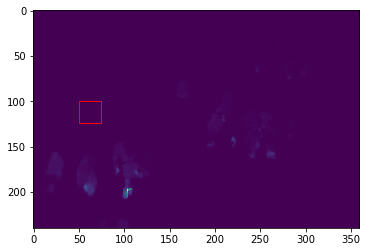

(217, 337)


In [26]:
np.load(savePath + 'Train' + str(seq+1) + '.npy')#, flow_seq)
# a = flow_seq[:,:,:,0]
from scipy import signal
import matplotlib.patches as patches
a_mag = np.sum(a**2,axis=2)
print(a_mag.shape)
# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(a_mag)

# Create a Rectangle patch
rect = patches.Rectangle((50,100),24,24,linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()
w = np.ones([24,24])
b = signal.convolve2d(a_mag, w, boundary='symm', mode='valid')
print(b.shape)